In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs


In [222]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [223]:
data = pd.read_csv(r'C:\Users\Hp\Desktop\dataset\Spotify_project\data (2).csv')
genre_data = pd.read_csv(r'C:\Users\Hp\Desktop\dataset\Spotify_project\data_by_genres.csv')
artist_data = pd.read_csv(r'C:\Users\Hp\Desktop\dataset\Spotify_project\data_by_artist.csv')
yaer_data = pd.read_csv(r'C:\Users\Hp\Desktop\dataset\Spotify_project\data_by_year.csv')

In [224]:
#print(data.isnull().sum())
#print(genre_data.isnull().sum())
#print(artist_data.isnull().sum())
#print(yaer_data.isnull().sum())

In [225]:
print('data', data.columns)
print('year', yaer_data.columns)
print('artist', artist_data.columns)
print('genre', genre_data.columns)

data Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')
year Index(['mode', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')
artist Index(['mode', 'count', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'key'],
      dtype='object')
genre Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')


In [226]:
# Create a decade column in data representing the decade of each track using apply() and a lambda function.
data['decade'] = data['year'].apply(lambda x: str(x)[:-1] + "0")

Text(0.5, 1.0, 'Track Count by Decade')

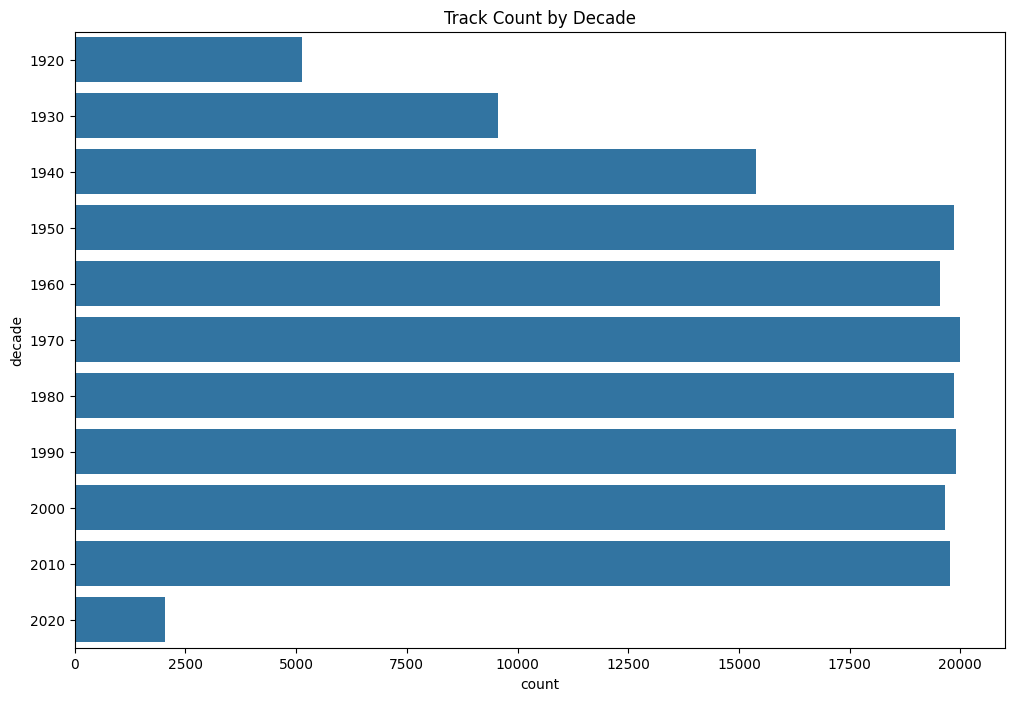

In [227]:
# Visualize the distribution of tracks across different decades using a count plot: sns.countplot(data['decade']).
%matplotlib inline
plt.figure(figsize=(12, 8))
sns.countplot(data['decade'])
plt.title('Track Count by Decade')


In [228]:
yaer_data.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


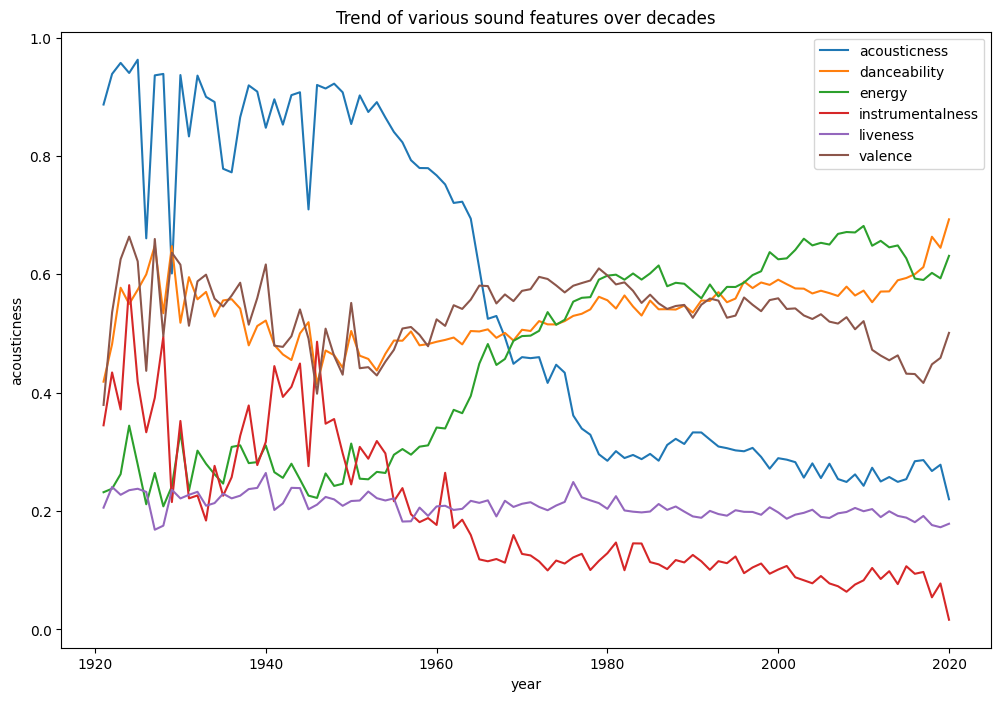

In [229]:
#Plot the trends of various sound features (acousticness, danceability, energy, instrumentalness, liveness, valence) over decades using a line plot: 
# px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades').
plt.figure(figsize=(12, 8))
sns.lineplot(data=yaer_data, x='year', y='acousticness', label='acousticness')
sns.lineplot(data=yaer_data, x='year', y='danceability', label='danceability')
sns.lineplot(data=yaer_data, x='year', y='energy', label='energy')
sns.lineplot(data=yaer_data, x='year', y='instrumentalness', label='instrumentalness')
sns.lineplot(data=yaer_data, x='year', y='liveness', label='liveness')
sns.lineplot(data=yaer_data, x='year', y='valence', label='valence')
plt.title('Trend of various sound features over decades')
plt.show()

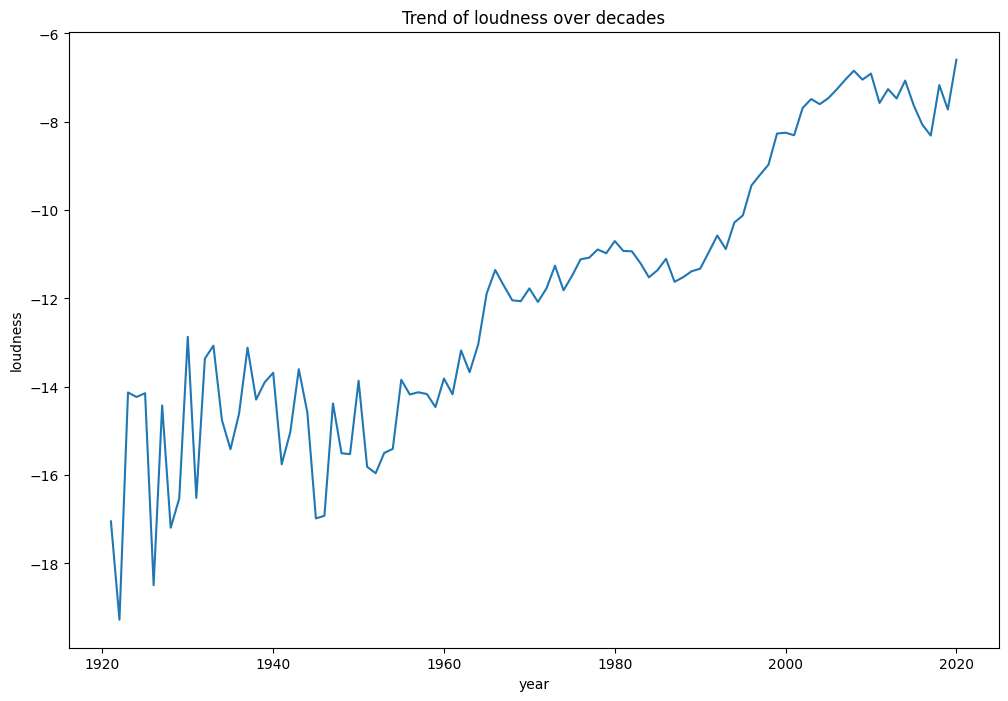

In [230]:
#Plot the trend of loudness over decades using a line plot: px.line(year_data, x='year', y='loudness', title='Trend of loudness over decades').
plt.figure(figsize=(12, 8))
sns.lineplot(data=yaer_data, x='year', y='loudness')
plt.title('Trend of loudness over decades')
plt.show()

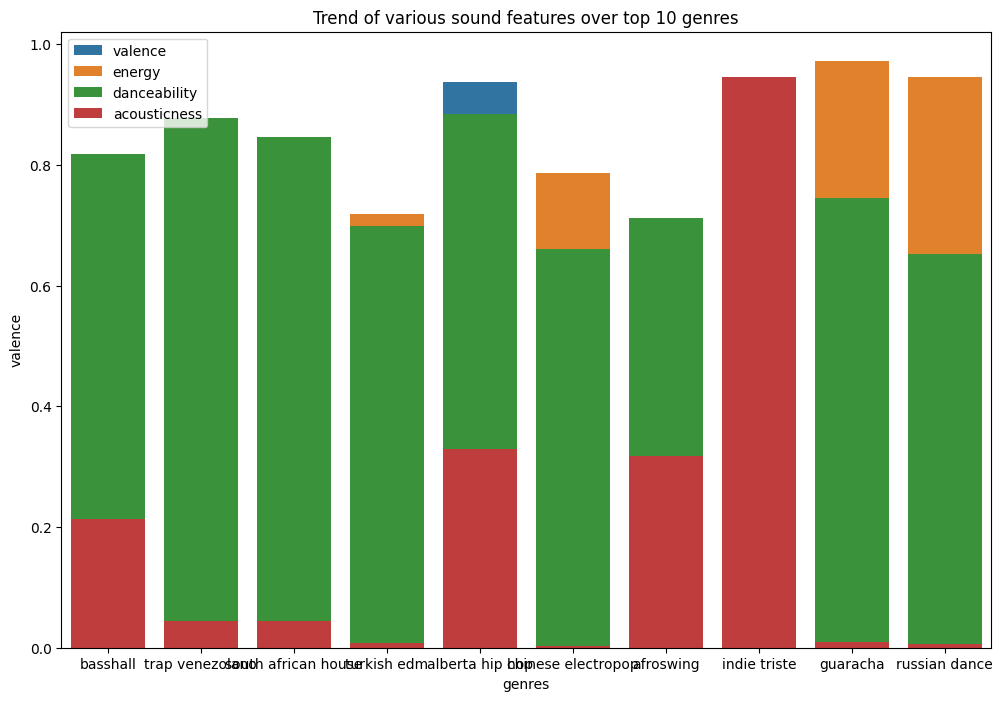

In [231]:
#identify the top 10 genres based on popularity and plot the trends of various sound features (valence, energy, danceability, acousticness) for these genres using a grouped bar chart: px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title='Trend of various sound features over top 10 genres').
top10_genres = genre_data.sort_values('popularity', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_genres, x='genres', y='valence', label='valence')
sns.barplot(data=top10_genres, x='genres', y='energy', label='energy')
sns.barplot(data=top10_genres, x='genres', y='danceability', label='danceability')
sns.barplot(data=top10_genres, x='genres', y='acousticness', label='acousticness')
plt.title('Trend of various sound features over top 10 genres')
plt.show()


In [232]:
# With plotly express
# Identify the top 10 genres based on popularity
top10_genres = genre_data.sort_values('popularity', ascending=False).head(10)

# Plot the trends of various sound features using a grouped bar chart
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'],
             barmode='group', title='Trend of Various Sound Features Over Top 10 Genres',
             labels={'value': 'Score', 'genres': 'Genres'},
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

In [233]:
genre_copy = genre_data.copy()

In [234]:
# Generate a word cloud of the genres present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, max_words=40, min_font_size=10).generate(comment_words)

# Combine all genres into a single string
comment_words = ' '.join(genre_copy['genres'])
# Define stopwords
stopwords = set(stopwords.words('english'))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=40,
                      min_font_size=10).generate(comment_words)


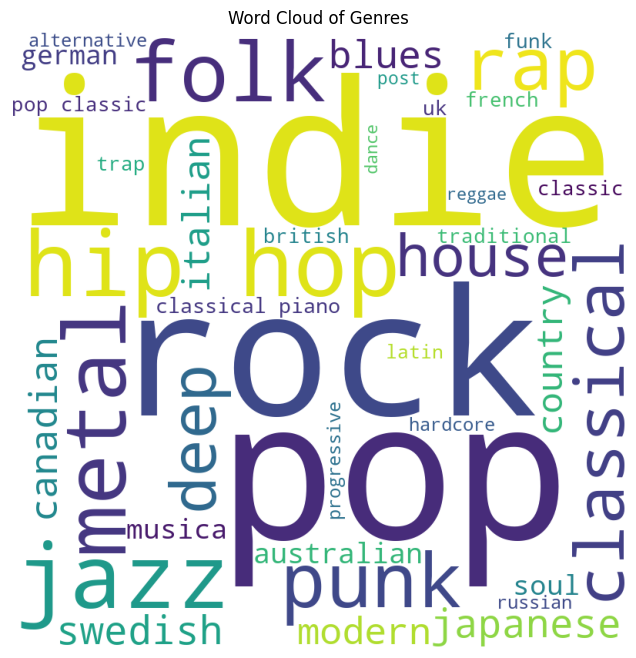

In [235]:
# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of Genres")
plt.show()


In [236]:
artist_copy = artist_data.copy()

In [237]:
# Generate a word cloud of the artists present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_word_length=3, max_words=40, min_font_size=10).generate(comment_words).

# Combine all artists into a single string
comment_words = ' '.join(artist_copy['artists'])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_word_length=3,
                      max_words=40,
                      min_font_size=10).generate(comment_words)


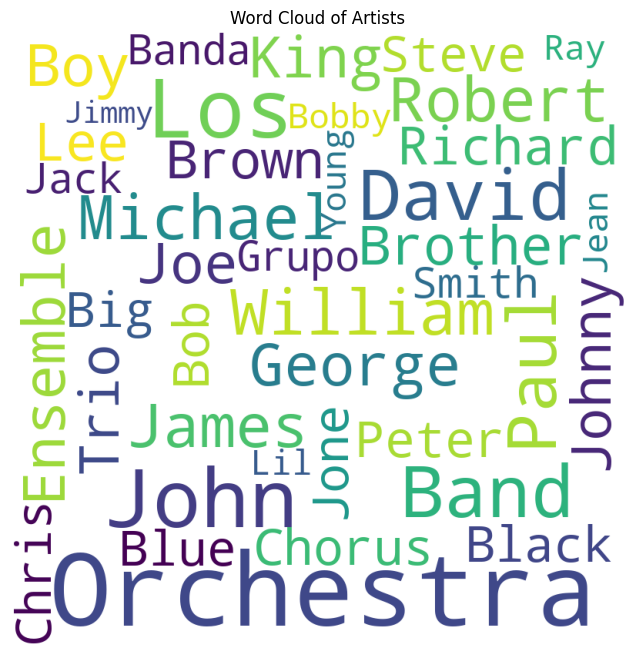

In [238]:
# Plot the word cloud of the artists: plt.imshow(wordcloud).
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of Artists")
plt.show()

In [239]:
# Identify the top 10 artists with the most songs produced and display the count and artist name: 
# top10_most_song_produced_artists[['count','artists']].sort_values('count', ascending=False).
top_10_artists_most_songs = artist_data.sort_values('count', ascending=False).head(10)
print(top_10_artists_most_songs[['count', 'artists']].sort_values('count', ascending=False))


       count            artists
8367    3169   Francisco Canaro
28561   2422   Эрнест Хемингуэй
28560   2136  Эрих Мария Ремарк
8434    1459      Frank Sinatra
10714   1256    Ignacio Corsini
27109   1200  Vladimir Horowitz
1682    1146   Arturo Toscanini
2707    1103     Billie Holiday
12378   1061        Johnny Cash
7426    1023      Elvis Presley


In [240]:
# Identify the top 10 artists with the highest popularity score and display the popularity score and artist name: 
# top10_popular_artists[['popularity','artists']].sort_values('popularity', ascending=False).
top_10_artist_high_popularity = artist_data.sort_values('popularity', ascending=False).head(10)
print(top_10_artist_high_popularity[['popularity', 'artists']].sort_values('popularity', ascending=False))

       popularity          artists
20966        93.0      Ritt Momney
14354        92.0        Lele Pons
15070        90.0  Los Legendarios
11764        89.0         Jerry Di
7463         88.0           Emilee
28263        88.0      salem ilese
23687        88.0        Surf Mesa
213          87.0              A7S
14378        86.0     Lenny Santos
16453        86.0        Master KG



- data is a dataset containing information about tracks, artists, and genres.
- yaer_data is a dataset containing information about tracks over the years.
- artist_data is a dataset containing information about artists.
- genre_data is a dataset containing information about genres.

We found similarity between the datasets, the same column on each data
We can :
- Merge the data using the 'artists' column to find the relationship between the artists and genres.
- Merge the artist_data and genre_data on the 'artists' column: artist_genre_data.

we can have one big data 
we can use sql server or other app to view and manage a relation between tables


In [241]:
genre_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [242]:
# list of features for clustering :
features = ['mode', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key']

# Preprocessing :
standar_scaler = StandardScaler()
scaler_genre_data = standar_scaler.fit_transform(genre_copy[features])


In [243]:
genre_data.shape, scaler_genre_data.shape

((2973, 14), (2973, 13))

In [244]:
# Fit the K-means model with 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
genre_data['cluster'] = kmeans.fit_predict(scaler_genre_data)

In [245]:
# Assign cluster labels to each genre
print(genre_data[['genres', 'cluster']])

                      genres  cluster
0     21st century classical       11
1                      432hz       10
2                      8-bit        2
3                         []        0
4                 a cappella        5
...                      ...      ...
2968                    zolo        2
2969                 zouglou        9
2970                    zouk        2
2971            zurich indie        0
2972                  zydeco        2

[2973 rows x 2 columns]


The t-SNE (t-distributed Stochastic Neighbor Embedding) technique is excellent for reducing high-dimensional data into two or three dimensions for visualization

In [246]:
# Visualize the clusters of genres using t-SNE dimensionality reduction technique.
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaler_genre_data)
genre_data['x'] = tsne.fit_transform(scaler_genre_data)[:, 0]
genre_data['y'] = tsne.fit_transform(scaler_genre_data)[:, 1]
 


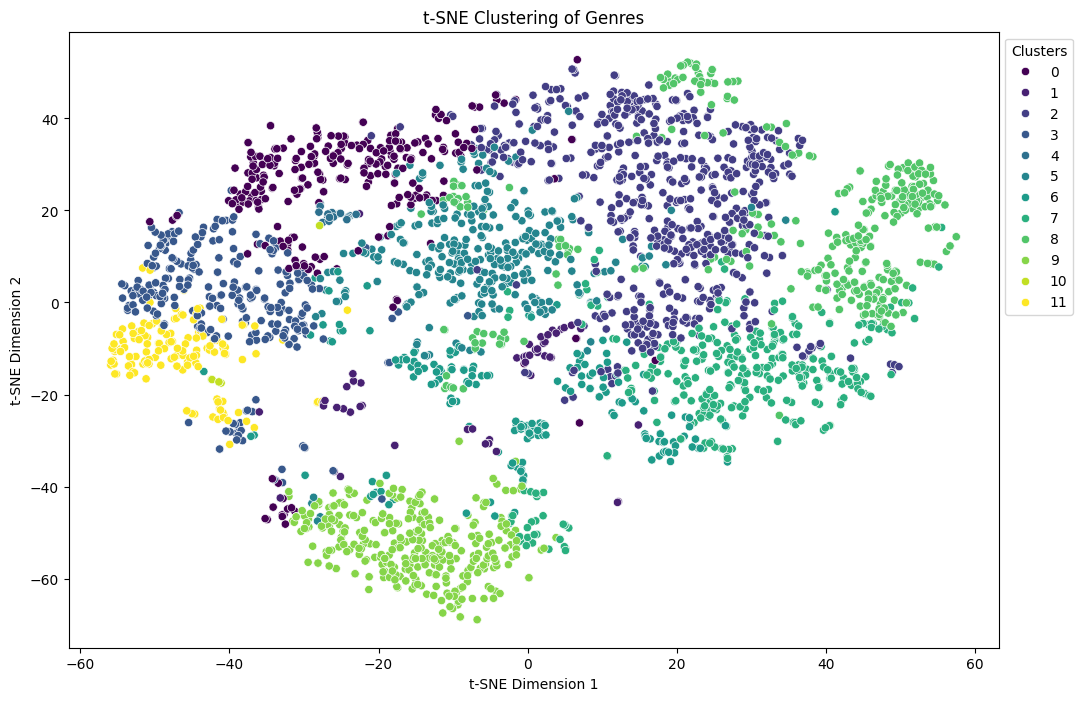

In [247]:
# Plot the scatter plot with clusters colored and display genre information on hover.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='x', y='y', hue='cluster', palette='viridis', data=genre_data, legend='full')
plt.title('t-SNE Clustering of Genres')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Clusters')
plt.show()

In [248]:
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'decade'],
      dtype='object')

In [249]:
# Fit a K-means clustering model on the song data using 25 clusters.
features_data = ['valence', 'acousticness', 'danceability', 'duration_ms', 
                 'energy', 'key', 'liveness', 'popularity', 'speechiness', 'tempo']

In [250]:
data_features = data[features_data].copy()

In [251]:
kmeans = KMeans(n_clusters=25, random_state=42)
data_features['cluster'] = kmeans.fit_predict(data[features])

In [254]:
# Assign the cluster labels to each song
data_query = data_features.copy()
data_query['name']= data['name']
print(data_query[['name', 'cluster']])

                                                     name  cluster
0       Piano Concerto No. 3 in D Minor, Op. 30: III. ...       11
1                                 Clancy Lowered the Boom        1
2                                               Gati Bali       14
3                                               Danny Boy       19
4                             When Irish Eyes Are Smiling        5
...                                                   ...      ...
170648                                              China       10
170649                        Halloweenie III: Seven Days        5
170650                                                AYA        8
170651                                           Darkness       17
170652                    Billetes Azules (with J Balvin)        1

[170653 rows x 2 columns]


In [255]:
#Visualize the clusters of songs using PCA dimensionality reduction technique.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[features_data])
data_features['pca_1'] = pca_result[:, 0]
data_features['pca_2'] = pca_result[:, 1]

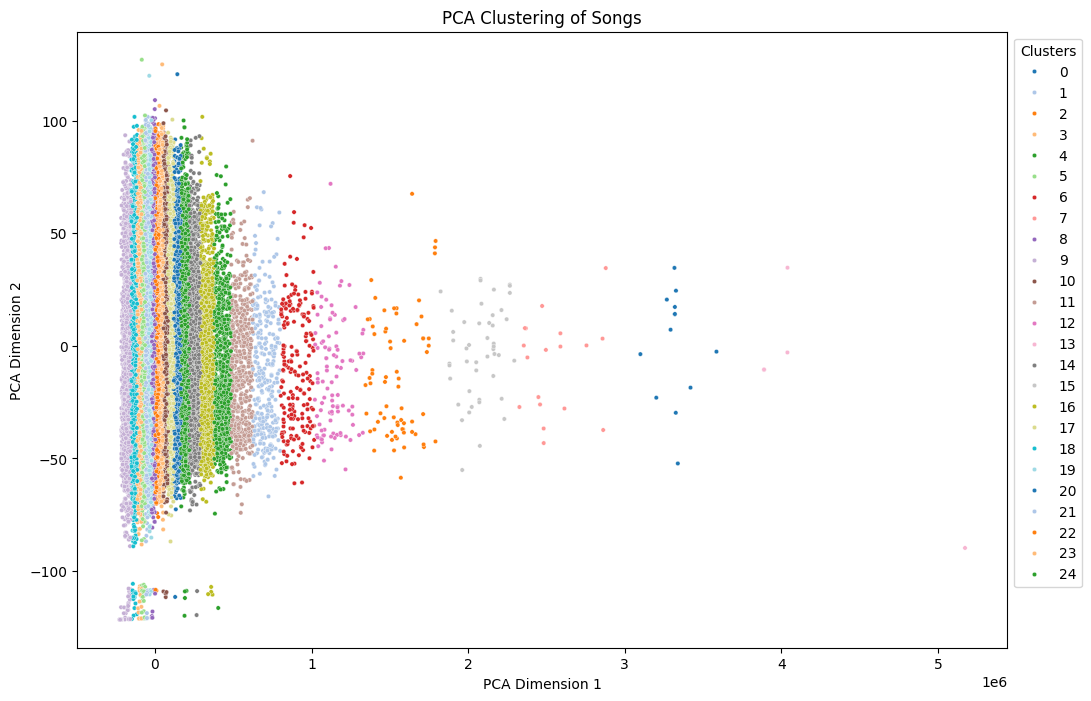

In [256]:
# Plot the scatter plot with clusters colored and display song information on hover.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_features, x='pca_1', y='pca_2', hue='cluster', 
                palette='tab20', legend='full', 
                s=10, alpha=1)
plt.title('PCA Clustering of Songs')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Clusters')
plt.show()

Using Pipeline

In [257]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'pca__n_components': [2, 3, 4, 5, 10]}                                               

In [258]:
# Run GridSearchCV to find the best parameters based on explained variance
pipeline = Pipeline([('pca', PCA()), ('kmeans', KMeans(n_clusters=25, random_state=42))])
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(data_features) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('kmeans',
                                        KMeans(n_clusters=25,
                                               random_state=42))]),
             param_grid={'pca__n_components': [2, 3, 4, 5, 10]})

In [259]:
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation explained variance score: {grid_search.best_score_}")

Best parameters: {'pca__n_components': 10}
Best cross-validation explained variance score: -9287380647094.512


In [260]:
# Evaluate the explained variance on the entire dataset
best_pipeline = grid_search.best_estimator_
transformed_data = best_pipeline.transform(data_features)
explained_variance = best_pipeline.named_steps['pca'].explained_variance_ratio_
print(f"Explained variance ratio by component: {explained_variance}")

Explained variance ratio by component: [9.99999923e-01 6.03096405e-08 1.43943706e-08 2.09120674e-09
 3.88369032e-10 4.28797502e-12 2.03868168e-12 1.04042585e-12
 9.63838747e-13 5.05037773e-13]


In [265]:
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = [p['pca__n_components'] for p in results['params']]

In [262]:
mean_scores, params

(array([-9.36886218e+12, -9.33500329e+12, -9.33020664e+12, -9.32385588e+12,
        -9.28738065e+12]),
 [2, 3, 4, 5, 10])

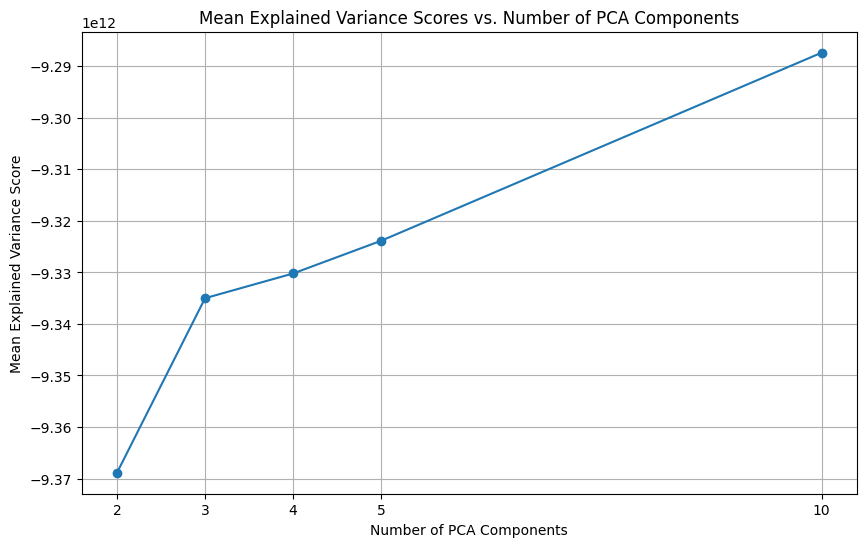

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(params, mean_scores, marker='o')
plt.title('Mean Explained Variance Scores vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Explained Variance Score')
plt.xticks(params)
plt.grid(True)
plt.show()

Pipeline includes a StandardScaler for feature normalization and PCA for dimensionality reduction.